### What’s TensorFlow?

TensorFlow is a Python-based, free, open-source machine learning platform, developed primarily by Google. Much like NumPy, the primary purpose of TensorFlow is to enable engineers and researchers to manipulate mathematical expressions over numerical tensors. But TensorFlow goes far beyond the scope of NumPy in the following ways:
* **It can automatically compute the gradient of any differentiable expression, making it highly suitable for machine learning.**
* It can run not only on CPU, but also on GPUs and TPUs, highly-parallel hardware accelerators.
* Computation defined in TensorFlow can be easily distributed across many machines.
* TensorFlow programs can be exported to other runtimes, such as C++, JavaScript (for browser-based applications), or TFLite (for applications running on mobile devices or embedded devices), etc. This makes TensorFlow applications easy to deploy in practical settings.

### What’s Keras?

Keras is a deep-learning API for Python, built on top of TensorFlow, that provides a convenient
way to define and train any kind of deep-learning model. Keras was initially developed for
research, with the aim of enabling fast deep learning experimentation.

Keras has well over 370,000 users as of late 2019, ranging from academic researchers, engineers,
and data scientists at both startups and large companies, to graduate students and hobbyists.
Keras is used at Google, Netflix, Uber, CERN, NASA, Yelp, Instacart, Square, and hundreds of
startups working on a wide range of problems across every industry. Keras is also a popular
framework on Kaggle, the machine-learning competition website, where most deep-learning
competitions have been won using Keras models.

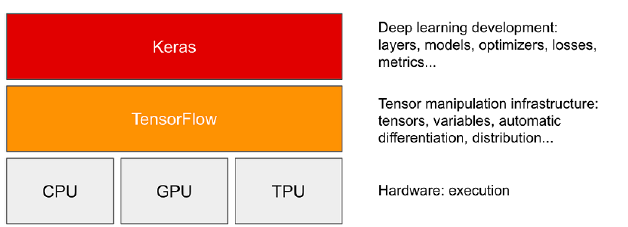

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2, 1)) #Equivalent np.ones(shape=(2, 1))
print(x)
x = tf.zeros(shape=(2, 1)) #Equivalent np.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [ ]:
# Random tensors
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)
##Tensor of random values drawn from a normal distribution with mean 0 and
# standard deviation 1. Equivalent to np.random.normal(size=(3, 1), loc=0.,scale=1.).

tf.Tensor(
[[ 0.33135843]
 [-1.8616159 ]
 [ 0.02305646]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)
##Tensor of random values drawn from a uniform distribution between 0 and 1.
# Equivalent to np.random.uniform(size=(3, 1), low=0., high=1.).

tf.Tensor(
[[0.03370225]
 [0.23599792]
 [0.08224714]], shape=(3, 1), dtype=float32)


**A significant difference between NumPy arrays and TensorFlow tensors is that TensorFlow tensors aren’t assignable: they’re constant. For instance, in NumPy, you can do:**

In [ ]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
x

array([[0., 1.],
       [1., 1.]])

In [ ]:
x = tf.ones(shape=(2, 2))
x[0, 0] = 0.

TypeError: ignored

**If tensors aren’t assignable, how do we do it, then? That’s where variables come in. tf.Variable is the class
meant to manage modifiable state in TensorFlow.**

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.7870956 ],
       [ 0.94065046],
       [ 1.9264055 ]], dtype=float32)>


In [ ]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

## Tensor operations: doing math in TensorFlow

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d
print("a:", a, "b:", b, "c:", c, "d:", d, "e:", e)

a: tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) b: tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) c: tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) d: tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) e: tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


**So far, TensorFlow seems to look a lot like NumPy. But here’s something NumPy can’t do: retrieve the gradient of any differentiable expression with respect to any of its inputs.**

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

It’s actually possible for these inputs to be any arbitrary tensor. However, only
trainable variables are being tracked by default. With a constant tensor, you’d have to manually mark it as being tracked, by calling tape.watch() on it:

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

the tape needs to know what to watch!!

# Linear classifier in pure Tensorflow

### Generating two classes of random points in a 2D plane

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

### Stacking the two classes into an array with shape (2000, 2)

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

### Generating the corresponding targets (0 and 1)

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),np.ones((num_samples_per_class, 1), dtype='float32')))

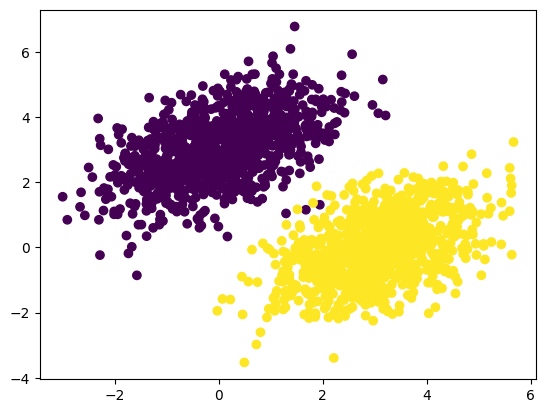

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [ ]:
## prediction = W*input +b

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [ ]:
## The forward pass function

def model(inputs):
    return tf.matmul(inputs, W) + b

In [ ]:
## The mean suared error loss function
## Why not the cross entropy log loss?

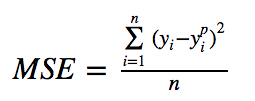

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [ ]:
## The training step

In [ ]:
learning_rate = 0.1
def training_step(inputs, targets):
    #Forward pass, inside of a gradient tape scope
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)

    #Retrieve the gradient of the loss with regard to weights
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])

    #Update the weights
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [ ]:
## Lets change a little bit the mini batch training for a full batch (complete dataset)
for step in range(30):
    loss = training_step(inputs, targets)
    print('Loss at step %d: %.4f' % (step, loss))

Loss at step 0: 0.2111
Loss at step 1: 0.0817
Loss at step 2: 0.0767
Loss at step 3: 0.0722
Loss at step 4: 0.0682
Loss at step 5: 0.0645
Loss at step 6: 0.0611
Loss at step 7: 0.0580
Loss at step 8: 0.0551
Loss at step 9: 0.0525
Loss at step 10: 0.0502
Loss at step 11: 0.0480
Loss at step 12: 0.0460
Loss at step 13: 0.0442
Loss at step 14: 0.0426
Loss at step 15: 0.0410
Loss at step 16: 0.0397
Loss at step 17: 0.0384
Loss at step 18: 0.0372
Loss at step 19: 0.0362
Loss at step 20: 0.0352
Loss at step 21: 0.0343
Loss at step 22: 0.0335
Loss at step 23: 0.0328
Loss at step 24: 0.0321
Loss at step 25: 0.0315
Loss at step 26: 0.0309
Loss at step 27: 0.0304
Loss at step 28: 0.0299
Loss at step 29: 0.0295


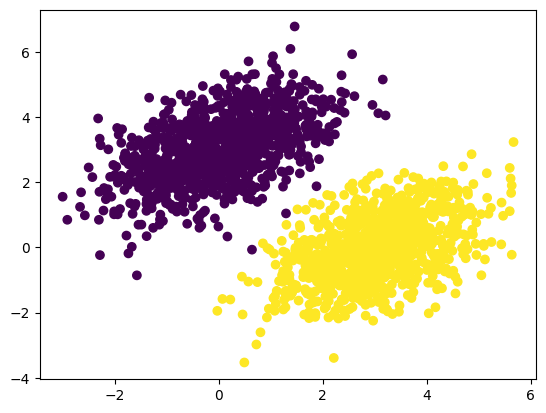

In [ ]:
## predictions
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()